In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import numpy as np 
import pandas as pd

In [77]:
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules

In [78]:
groc = pd.read_fwf('/content/drive/MyDrive/dataset_da/groceries.csv',header=None)
groc

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [79]:
x_list = groc[0].tolist()
x_list

['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes',
 'beef',
 'frankfurter,rolls/buns,soda',
 'chicken,tropical fruit',
 'butter,sugar,fruit/vegetable juice,newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk,pastry',
 'whole milk',
 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers',
 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,sal

In [80]:
items = []
n_list = []
for i in x_list:
  j = i.split(',')
  j = [l.strip() for l in j]
  j = [l.replace(' ','-') for l in j]
  n_list.append(j)
  items += j

len(items)

42303

In [81]:
itm = set(items)
itm

{'',
 'Instant-f',
 'Instant-fo',
 'Instant-food',
 'Instant-food-produ',
 'Instant-food-products',
 'UHT-milk',
 'abrasi',
 'abrasive-cleaner',
 'artif.-sweetener',
 'b',
 'baby-cosmetics',
 'bags',
 'bak',
 'bakin',
 'baking',
 'baking-po',
 'baking-powd',
 'baking-powder',
 'bathroom-cl',
 'bathroom-cleaner',
 'beef',
 'berries',
 'beverages',
 'bo',
 'bot',
 'bott',
 'bottl',
 'bottle',
 'bottled',
 'bottled-bee',
 'bottled-beer',
 'bottled-w',
 'bottled-wat',
 'bottled-water',
 'brandy',
 'brown-b',
 'brown-bre',
 'brown-brea',
 'brown-bread',
 'butter',
 'butter-milk',
 'c',
 'ca',
 'cake',
 'cake-bar',
 'can',
 'candles',
 'candy',
 'cann',
 'canne',
 'canned',
 'canned-beer',
 'canned-f',
 'canned-fish',
 'canned-fruit',
 'canned-veg',
 'canned-vegetables',
 'cat-f',
 'cat-food',
 'cereals',
 'ch',
 'chew',
 'chewing-g',
 'chewing-gum',
 'chicken',
 'chocol',
 'chocola',
 'chocolat',
 'chocolate',
 'chocolate-m',
 'chocolate-marshma',
 'chocolate-marshmall',
 'chocolate-marshma

In [93]:
ss = [['whit', 'white-bread'],
['white', 'white-bread'],
['white-b', 'white-bread'],
['whipped/sour','whipped/sour-cream'],
['w','waffles'],
['waff','waffles'],
['waffl','waffles'],
['vineg','vinegar'],
['swe','sweet-spreads'],
['Instant-f','Instant-food-products'],
['Instant-fo','Instant-food-products'],
['Instant-food','Instant-food-products'],
['Instant-food-produ','Instant-food-products'],
['abrasi','abrasive-cleaner'],
['b','baking-powder'],
['bak','baking-powder'],
['bakin','baking-powder'],
['baking','baking-powder'],
['baking-po','baking-powder'],
['baking-powd','baking-powder'],
['bathroom-cl','bathroom-cleaner'],
['bo','bottled-beer'],
['bot','bottled-beer'],
['bott','bottled-beer'],
['bottl','bottled-beer'],
['bottle','bottled-beer'],
['bottled','bottled-beer'],
['bottled-bee','bottled-beer'],
['bottled-w','bottled-water'],
['bottled-wat','bottled-water'],
['brown-b','brown-bread'],
['brown-bre','brown-bread'],
['brown-brea','brown-bread'],
['butter','butter-milk'],
['c','cake-bar'],
['ca','cake-bar'],
['cake','cake-bar'],
['can','candles'],
['cann','canned-beer'],
['canne','canned-beer'],
['canned','canned-beer'],
['canned-f','canned-fish'],
['canned-veg','canned-vegetables'],
['cat-f','cat-food'],
['ch','chewing-gum'],
['chew','chewing-gum'],
['chewing-g','chewing-gum'],
['chocol','chocolate-marshmallow'],
['chocola','chocolate-marshmallow'],
['chocolat','chocolate-marshmallow'],
['chocolate','chocolate-marshmallow'],
['chocolate-m','chocolate-marshmallow'],
['chocolate-marshma','chocolate-marshmallow'],
['chocolate-marshmall','chocolate-marshmallow'],
['clea','cleaner'],
['clin','cling-film/bags'],
['cling','cling-film/bags'],
['cling-film/','cling-film/bags'],
['coffe','coffee'],
['cooking-chocolat','cooking-chocolate'],
['cream','cream-cheese'],
['cream-chee','cream-cheese'],
['curd','curd-cheese'],
['d','decalcifier'],
['de','decalcifier'],
['decal','decalcifier'],
['dent','dental-care'],
['dental','dental-care'],
['dental-c','dental-care'],
['dental-car','dental-care'],
['det','detergent'],
['deterge','detergent'],
['di','dish-cleaner'],
['dis','dish-cleaner'],
['do','dog-food'],
['domes','domestic-eggs'],
['domestic','domestic-eggs'],
['domestic-e','domestic-eggs'],
['f','female-sanitary-products'],
['fema','female-sanitary-products'],
['female-san','female-sanitary-products'],
['female-sanitary-prod','female-sanitary-products'],
['female-sanitary-product','female-sanitary-products'],
['flower-(seed','flower-(seed)'],
['fr','frankfurter'],
['fro','frozen-chicken'],
['frozen','frozen-chicken'],
['frozen-des','frozen-dessert'],
['frozen-fis','frozen-fish'],
['frozen-meal','frozen-meals'],
['frozen-ve','frozen-vegetables'],
['frozen-veg','frozen-vegetables'],
['frozen-vege','frozen-vegetables'],
['frozen-vegetable','frozen-vegetables'],
['fru','fruit/vegetable-juice'],
['frui','fruit/vegetable-juice'],
['fruit','fruit/vegetable-juice'],
['fruit/v','fruit/vegetable-juice'],
['fruit/ve','fruit/vegetable-juice'],
['fruit/vege','fruit/vegetable-juice'],
['fruit/veget','fruit/vegetable-juice'],
['fruit/vegetab','fruit/vegetable-juice'],
['fruit/vegetabl','fruit/vegetable-juice'],
['fruit/vegetable','fruit/vegetable-juice'],
['fruit/vegetable-jui','fruit/vegetable-juice'],
['fruit/vegetable-juic','fruit/vegetable-juice'],
['h','hair-spray'],
['ham','hamburger-meat'],
['hous','house-keeping-products'],
['house-k','house-keeping-products'],
['house-kee','house-keeping-products'],
['house-keeping-produc','house-keeping-products'],
['hyg','hygiene-articles'],
['hygie','hygiene-articles'],
['hygien','hygiene-articles'],
['hygiene','hygiene-articles'],
['hygiene-a','hygiene-articles'],
['hygiene-arti','hygiene-articles'],
['hygiene-articl','hygiene-articles'],
['ice-cre','ice-cream'],
['ki','kitchen-towels'],
['kit','kitchen-towels'],
['kitchen-towe','kitchen-towels'],
['kitchen-u','kitchen-utensil'],
['li','light-bulbs'],
['light','light-bulbs'],
['liquor','liquor-(appetizer)'],
['liquor-(ap','liquor-(appetizer)'],
['lo','long-life-bakery-product'],
['lon','long-life-bakery-product'],
['long','long-life-bakery-product'],
['long-li','long-life-bakery-product'],
['long-lif','long-life-bakery-product'],
['long-life','long-life-bakery-product'],
['long-life-ba','long-life-bakery-product'],
['long-life-bak','long-life-bakery-product'],
['long-life-bake','long-life-bakery-product'],
['long-life-baker','long-life-bakery-product'],
['long-life-bakery-p','long-life-bakery-product'],
['long-life-bakery-pr','long-life-bakery-product'],
['long-life-bakery-pro','long-life-bakery-product'],
['long-life-bakery-produ','long-life-bakery-product'],
['long-life-bakery-produc','long-life-bakery-product'],
['m','make-up-remover'],
['ma','make-up-remover'],
['mar','margarine'],
['marg','margarine'],
['marga','margarine'],
['margari','margarine'],
['mayonna','mayonnaise'],
['meat','meat-spreads'],
['meat-sp','meat-spreads'],
['mis','misc.-beverages'],
['misc.-b','misc.-beverages'],
['misc.-bev','misc.-beverages'],
['misc.-beverage','misc.-beverages'],
['mu','mustard'],
['n','napkins'],
['na','napkins'],
['nap','napkins'],
['napkin','napkins'],
['new','newspapers'],
['news','newspapers'],
['newsp','newspapers'],
['newspa','newspapers'],
['newspap','newspapers'],
['newspaper','newspapers'],
['o','oil'],
['p','packaged-fruit/vegetables'],
['past','pasta'],
['pickled','pickled-vegetables'],
['pickled-ve','pickled-vegetables'],
['pickled-veg','pickled-vegetables'],
['pickled-vegeta','pickled-vegetables'],
['pickled-vegetabl','pickled-vegetables'],
['pickled-vegetable','pickled-vegetables'],
['po','popcorn'],
['pot','pot-plants'],
['pot-p','pot-plants'],
['pot-plan','pot-plants'],
['preservat','preservation-products'],
['process','processed-cheese'],
['processed','processed-cheese'],
['pudding','pudding-powder'],
['pudding-pow','pudding-powder'],
['r','ready-soups'],
['red','red/blush-wine'],
['red/','red/blush-wine'],
['red/blu','red/blush-wine'],
['red/blush','red/blush-wine'],
['red/blush-wi','red/blush-wine'],
['rol','roll-products'],
['roll','roll-products'],
['rolls/b','rolls/buns'],
['rolls/bun','rolls/buns'],
['rubbing-alco','rubbing-alcohol'],
['s','salad-dressing'],
['sa','salad-dressing'],
['sal','salad-dressing'],
['salt','salty-snack'],
['salty-s','salty-snack'],
['salty-snac','salty-snack'],
['se','seasonal-products'],
['sea','seasonal-products'],
['season','seasonal-products'],
['seasonal','seasonal-products'],
['semi-','semi-finished-bread'],
['semi-fi','semi-finished-bread'],
['sh','shopping-bags'],
['sho','shopping-bags'],
['shop','shopping-bags'],
['shoppi','shopping-bags'],
['shoppin','shopping-bags'],
['shopping','shopping-bags'],
['shopping-b','shopping-bags'],
['shopping-ba','shopping-bags'],
['shopping-bag','shopping-bags'],
['sk','skin-care'],
['slice','sliced-cheese'],
['sliced-chees','sliced-cheese'],
['snack-produc','snack-products'],
['so','soap'],
['sod','soda'],
['spec','specialty-bar'],
['speci','specialty-bar'],
['specia','specialty-bar'],
['specialt','specialty-bar'],
['specialty','specialty-bar'],
['specialty-che','specialty-cheese'],
['specialty-chee','specialty-cheese'],
['specialty-cho', 'specialty-chocolate'],
['specialty-choc', 'specialty-chocolate'],
['specialty-chocola', 'specialty-chocolate'],
['specialty-fa','specialty-fat'],
['specialty-vegetable','specialty-vegetable'],
['spi','spices'],
['suga','sugar']]

In [94]:
rep={}
def repl(x,y):
  global rep
  rep[x] = y


In [95]:
for i in ss:
  print(i)
  repl(i[0],i[1])

['whit', 'white-bread']
['white', 'white-bread']
['white-b', 'white-bread']
['whipped/sour', 'whipped/sour-cream']
['w', 'waffles']
['waff', 'waffles']
['waffl', 'waffles']
['vineg', 'vinegar']
['swe', 'sweet-spreads']
['Instant-f', 'Instant-food-products']
['Instant-fo', 'Instant-food-products']
['Instant-food', 'Instant-food-products']
['Instant-food-produ', 'Instant-food-products']
['abrasi', 'abrasive-cleaner']
['b', 'baking-powder']
['bak', 'baking-powder']
['bakin', 'baking-powder']
['baking', 'baking-powder']
['baking-po', 'baking-powder']
['baking-powd', 'baking-powder']
['bathroom-cl', 'bathroom-cleaner']
['bo', 'bottled-beer']
['bot', 'bottled-beer']
['bott', 'bottled-beer']
['bottl', 'bottled-beer']
['bottle', 'bottled-beer']
['bottled', 'bottled-beer']
['bottled-bee', 'bottled-beer']
['bottled-w', 'bottled-water']
['bottled-wat', 'bottled-water']
['brown-b', 'brown-bread']
['brown-bre', 'brown-bread']
['brown-brea', 'brown-bread']
['butter', 'butter-milk']
['c', 'cake-bar']

In [ ]:
rep

In [101]:
it = list(itm)
for i in range(len(it)):
  if it[i] in rep.keys():
    it[i] = rep[it[i]]

In [102]:
itm = list(set(it))

In [105]:
itm = itm[1:]

In [106]:
dat = []
for i in range(len(n_list)):
  l=[]
  for j in itm:
    if j in n_list[i]:
      l.append(1)
    else:
      l.append(0)
  dat.append(l)

In [ ]:
dat

In [108]:
len(dat),len(dat[0])

(9835, 162)

In [110]:
df = pd.DataFrame(dat,columns=itm)
df

,dishes,kitchen-towels,pip-fruit,rubbing-alcohol,canned-beer,specialty-fat,Instant-food-products,toilet-cleaner,tidbits,pudding-powder,...,mayonnaise,decalcifier,misc.-beverages,pickled-vegetables,tropical-fruit,canned-fruit,specialty-vegetables,curd-cheese,soft-cheese,soap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
frq_items = apriori(df, min_support = 0.001, use_colnames = True)
frq_items

,support,itemsets
0,0.016878,(dishes)
1,0.004779,(kitchen-towels)
2,0.075648,(pip-fruit)
3,0.076360,(canned-beer)
4,0.003254,(specialty-fat)
...,...,...
7016,0.001525,"(whole-milk, yogurt, tropical-fruit, sausage, ..."
7017,0.001525,"(rolls/buns, whole-milk, yogurt, tropical-frui..."
7018,0.001423,"(whole-milk, whipped/sour-cream, yogurt, tropi..."
7019,0.001322,"(whole-milk, yogurt, tropical-fruit, pip-fruit..."


In [120]:
rules = association_rules(frq_items, metric ="confidence", min_threshold = 0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(grapes, onions)",(other-vegetables),0.001220,0.193493,0.001118,0.916667,4.737476,0.000882,9.678088
1,"(soups, bottled-beer)",(whole-milk),0.001118,0.255516,0.001017,0.909091,3.557863,0.000731,8.189324
2,"(pip-fruit, cream-cheese, whipped/sour-cream)",(whole-milk),0.001118,0.255516,0.001017,0.909091,3.557863,0.000731,8.189324
3,"(whipped/sour-cream, dessert, tropical-fruit)",(other-vegetables),0.001220,0.193493,0.001118,0.916667,4.737476,0.000882,9.678088
4,"(whipped/sour-cream, flour, root-vegetables)",(whole-milk),0.001525,0.255516,0.001525,1.000000,3.913649,0.001135,inf
5,"(whipped/sour-cream, cream-cheese, tropical-fr...",(other-vegetables),0.001118,0.193493,0.001017,0.909091,4.698323,0.000800,8.871581
6,"(whole-milk, butter-milk, pork)",(other-vegetables),0.001118,0.193493,0.001017,0.909091,4.698323,0.000800,8.871581
7,"(hamburger-meat, whipped/sour-cream, tropical-...",(other-vegetables),0.001118,0.193493,0.001017,0.909091,4.698323,0.000800,8.871581
8,"(whipped/sour-cream, soft-cheese, tropical-fruit)",(other-vegetables),0.001118,0.193493,0.001017,0.909091,4.698323,0.000800,8.871581
9,"(citrus-fruit, cream-cheese, domestic-eggs)",(whole-milk),0.001627,0.255516,0.001525,0.937500,3.669046,0.001109,11.911744


EXERCISE - 1

Basic association rule creation manually

The 'database' below has four transactions. What association rules can be found in this set, if the minimum support (i.e coverage) is 60% and the minimum confidence (i.e. accuracy) is 80% ?

Trans_id Itemlist

T1 {K, A, D, B}

T2 {D, A C, E, B}

T3 {C, A, B, E}

T4 {B, A, D}

Hint: Make a tabular and binary representation of the data in order to better see the relationship between Items. First generate all item sets with minimum support of 60%. Then form rules and calculate their confidence base on the conditional probability P(B|A) = |B∩A| / |A|. Remember to only take the item sets from the previous phase whose support is 60% or more.

In [69]:
data = [
        [1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 0, 1, 0],
        [1, 1, 0, 1, 0, 0]
]

In [70]:
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E', 'K'])
df

,A,B,C,D,E,K
0,1,1,0,1,0,1
1,1,1,1,1,1,0
2,1,1,1,0,1,0
3,1,1,0,1,0,0


In [71]:
frq_items = apriori(df, min_support = 0.6, use_colnames = True)
frq_items

,support,itemsets
0,1.00,(A)
1,1.00,(B)
2,0.75,(D)
3,1.00,"(B, A)"
4,0.75,"(D, A)"
5,0.75,"(D, B)"
6,0.75,"(D, B, A)"


In [73]:
rules = association_rules(frq_items, metric ="confidence", min_threshold = 0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B),(A),1.00,1.0,1.00,1.0,1.0,0.0,inf
1,(A),(B),1.00,1.0,1.00,1.0,1.0,0.0,inf
2,(D),(A),0.75,1.0,0.75,1.0,1.0,0.0,inf
3,(D),(B),0.75,1.0,0.75,1.0,1.0,0.0,inf
4,"(D, B)",(A),0.75,1.0,0.75,1.0,1.0,0.0,inf
5,"(D, A)",(B),0.75,1.0,0.75,1.0,1.0,0.0,inf
6,(D),"(B, A)",0.75,1.0,0.75,1.0,1.0,0.0,inf


Below are the association rules found:

* B => A
* A => B
* D => A
* D => B
* (D,B) => A
* (D,A) => B
* D => (B,A)

Exercise 2: Input file generation and Initial experiments with Weka's association rule discovery.

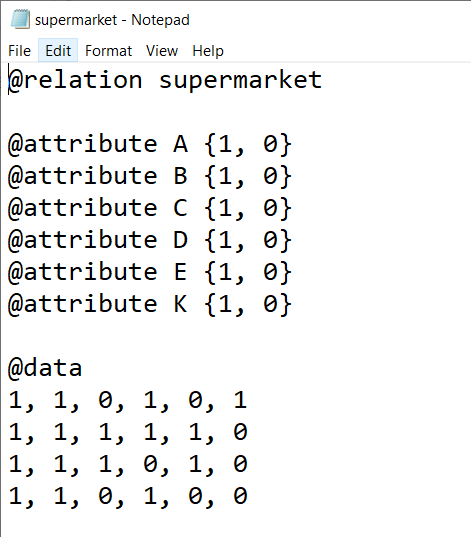

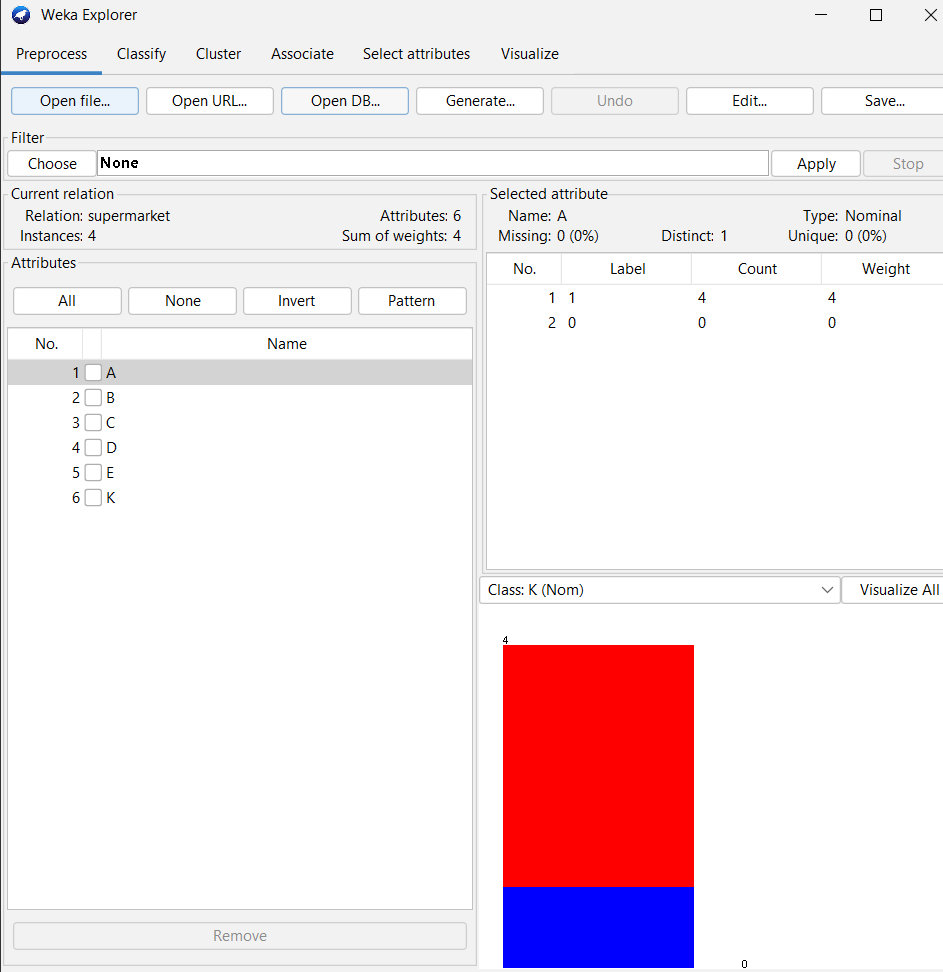

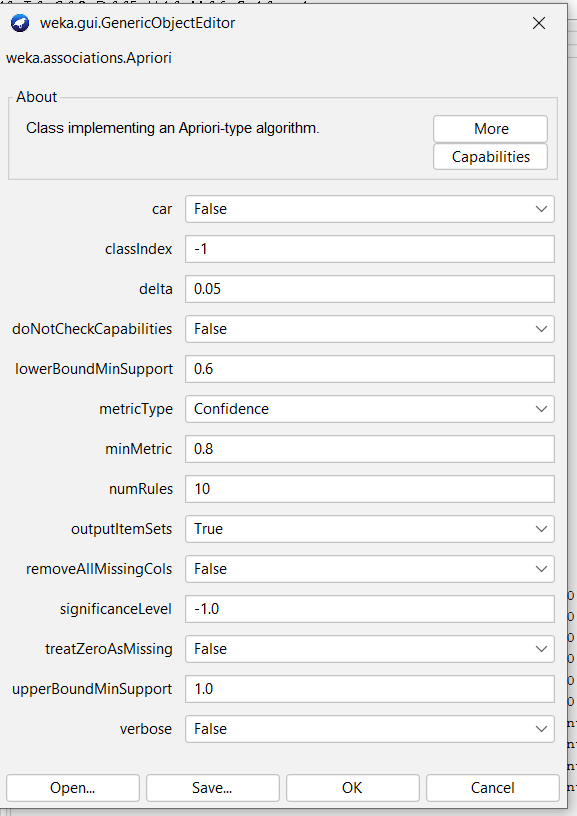

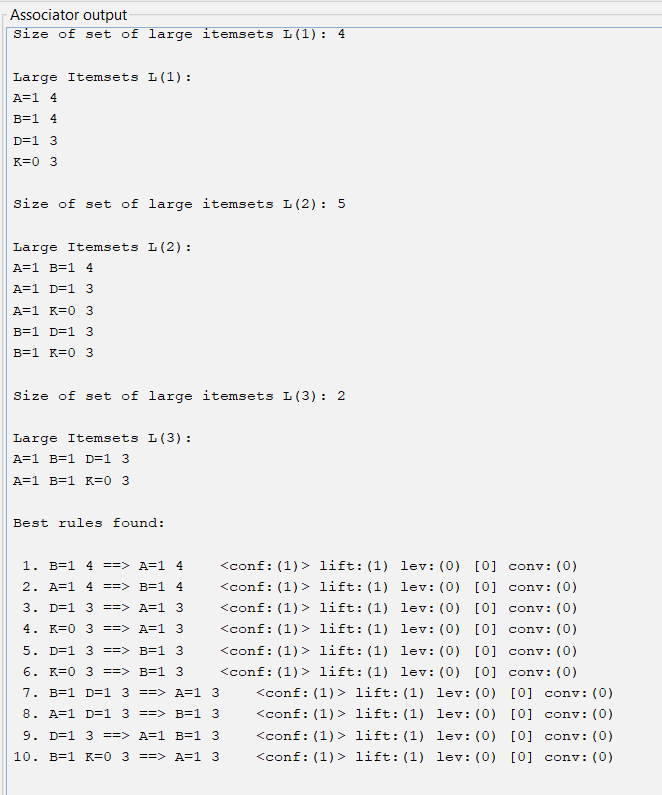

* We observe that association rules that we determined using manual method, are 
exactly same as that of given by WEKA.

* I used the supermarket.arff file of which i have added the screenshot above

Exercise 3: Mining Association Rule with WEKA Explorer – Weather dataset

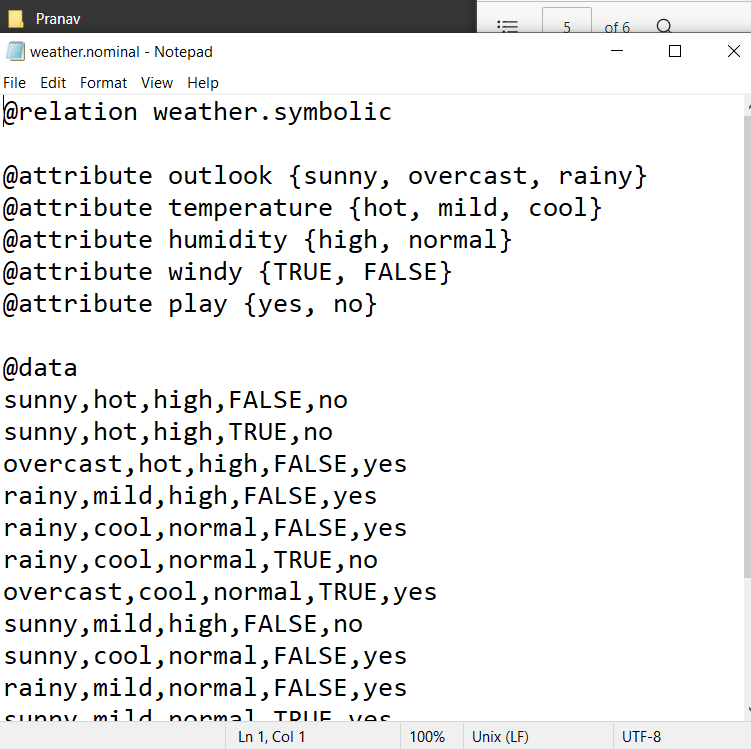

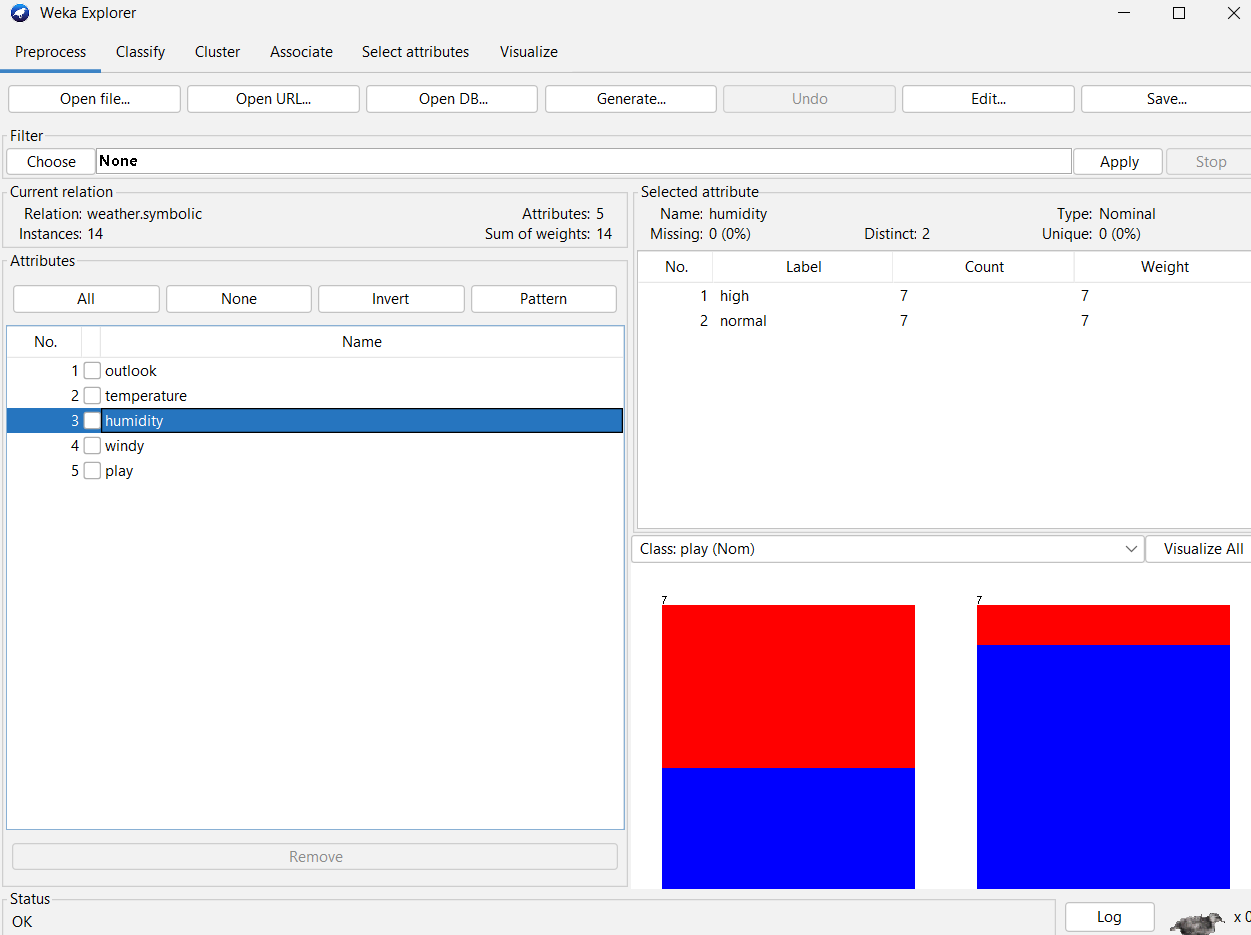

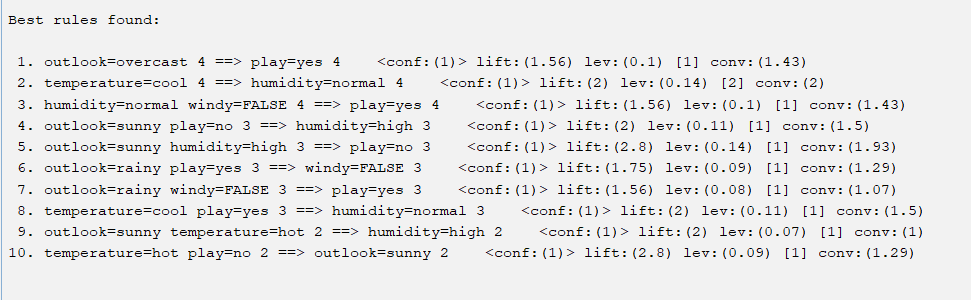

unlike decision tree, where we predict the output play depending upon the the other features, here the reverse is also possible.

rule 3: 

* hum=normal, windy=false then play=yes

rule 6:

* outlook=rainy, play=yes => windy=False

Exercise 4: Mining Association Rule with WEKA Explorer – Vote

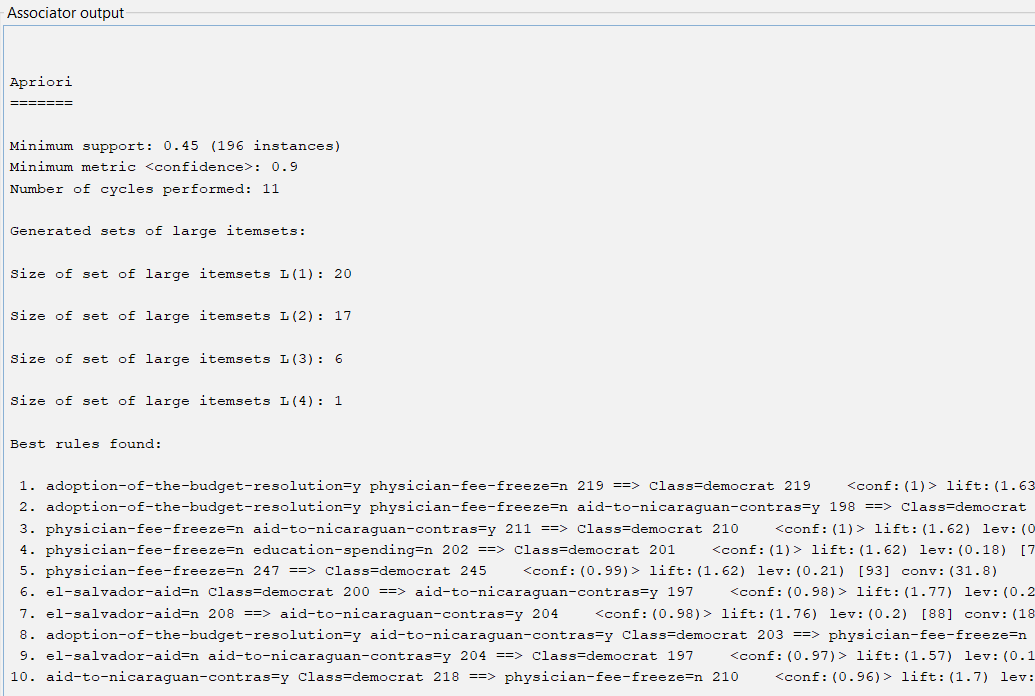

number of members of Democratic party are more in number as compared to 
members of Republic party which ultimately increases the probability of their 
appearance in the most frequent item sets. Hence, we see no member of republic 
party in the rules. Probably if we increase the number of members of Republic party, 
we may find few entries in rules

Exercise 5: Let’s run Apriori on another real-world dataset

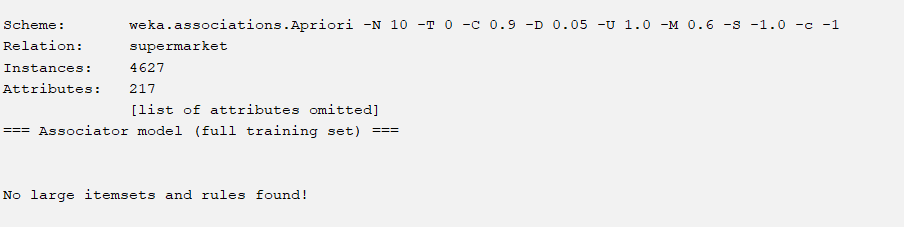

with minsupport as 0.6 and minconf as 0.9 no large itemsets and rules are found

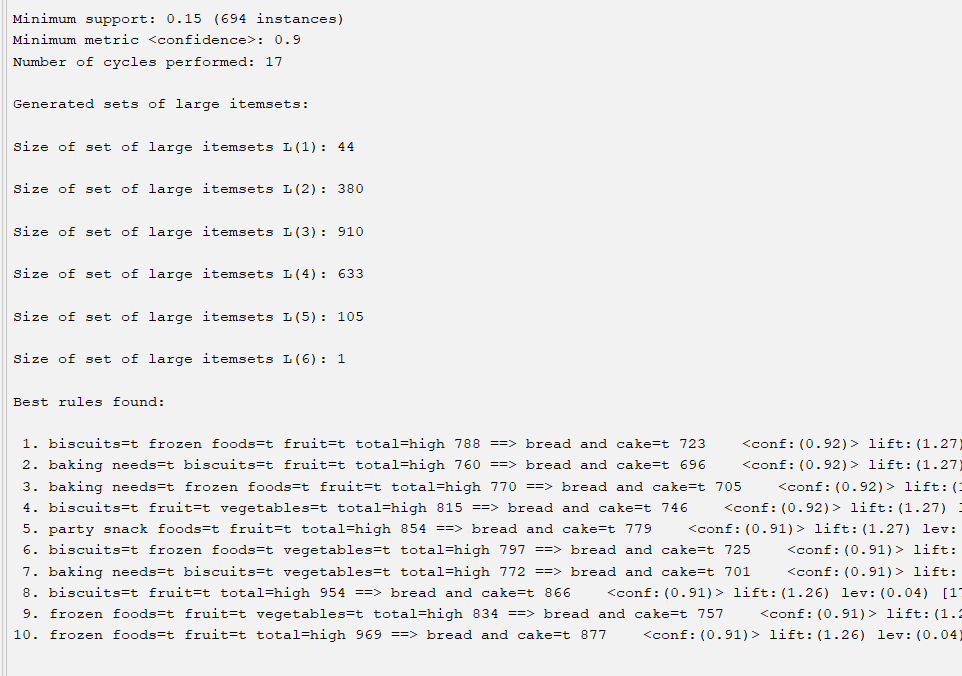

with min support as 0.15 and minconf as 0.9 we obtain the itemsets and rules


## INFERENCE :

Apriori algorithm is a sequence of steps to be followed to find the most frequent itemset in the given database. This data mining technique follows the join and the prune steps iteratively until the most frequent itemset is achieved. The parameters “support” and “confidence” are used. Support refers to items' frequency of occurrence; confidence is a conditional probability. Items in a transaction form an item set. Apriori Algorithm usually contains or deals with a large number of transactions. For example, customers buying a lot of goods from a grocery store, by applying this method of the algorithm the grocery stores can enhance their sales performance and could work effectively. The objective of using Apriori algorithm is to find frequent itemsets and association between different itemsets, that is, association rule. Association rule mining, at a basic level, involves the use of machine learning models to analyze data for patterns, or co-occurrences, in a database. It identifies frequent if-then associations, which themselves are the association rules. An association rule has two parts: an antecedent (if) and a consequent (then). An antecedent is an item found within the data. A consequent is an item found in combination with the antecedent. Association rules are created by searching data for frequent if-then patterns and using the criteria support and confidence to identify the most important relationships. A third metric, called lift, can be used to compare confidence with expected confidence, or how many times an if-then statement is expected to be found true.